## Setup Environment

In [1]:
# Install specific libraries
! pip install transformers
! pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 662.4/662.4 KB 50.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.1 MB/s eta 0:00:00
  Installing build dependencies ... done


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import pycaret
import transformers
from transformers import AutoModel, BertTokenizerFast
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
import torch.nn as nn
# specify GPU
device = torch.device("cuda")

In [ ]:
# Mount Google Drive - applicable, if working on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Set Working Directory - if working on Google Drive
%cd /content/drive/MyDrive/work

# # Set Working Directory - if working on Local Machine
# import os
# os.chdir('/Users//replace_me')

/content/drive/MyDrive/work


## Load Dataset

In [5]:
# # Load Dataset
# true_data = pd.read_csv('a1_True.csv')
# fake_data = pd.read_csv('a2_Fake.csv')

# # Generate labels True/Fake under new Target Column in 'true_data' and 'fake_data'
# true_data['Target'] = ['True']*len(true_data)
# fake_data['Target'] = ['Fake']*len(fake_data)

# # Merge 'true_data' and 'fake_data', by random mixing into a single df called 'data'
# data = true_data.append(fake_data).sample(frac=1).reset_index().drop(columns=['index'])
data = pd.read_csv('/content/drive/MyDrive/work/text_balanced.csv')
# See how the data looks like
print(data.shape)
data.head()

(2232, 12)


,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label
0,ActivistPost,2016-11-08T17:20:22.420+02:00,reasons why i am not voting,by justin gardner as the controversial dakota ...,english,activistpost.com,No Image URL,conspiracy,reasons voting,justin gardner controversial dakota access pip...,0,Fake
1,No Author,2016-11-18T11:40:54.247+02:00,ne supportant plus lambiance de la campagne él...,lifting weights could ward off dementia and ma...,english,legorafi.fr,No Image URL,satire,primaire françois fillon se désiste au profit ...,keywords alkaline water water either acidic al...,0,Fake
2,Dr. Patrick Slattery,2016-11-16T11:07:07.314+02:00,slattery and dankof we won now what,editorial by dr david duke \ntrump appoints m...,english,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,slattery dankof,editorial dr david duke trump appoints men tak...,1,Real
3,The Independent,2016-10-28T18:51:02.589+03:00,social media activity can show early signs of ...,draftourdaughters prowar hillary faces backlas...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,black activist blasts hillary clinton wikileak...,globalists behind rigged us elections election...,1,Fake
4,Hrafnkell Haraldsson,2016-10-31T18:27:33.972+02:00,it turns out trump put off investigators for ...,interviews syria should be able to choose its ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,explosive audio surfaces gop senator joking gu...,file photo shows former rebel renamo fighters ...,1,Real


In [6]:
# Target column is made of string values True/Fake, let's change it to numbers 0/1 (Fake=1) 
data['Target'] = pd.get_dummies(data.label)['Fake']

In [ ]:
# # Target column is made of string values True/Fake, let's change it to numbers 0/1 (Fake=1) 
# data['label'] = data['label'].map({'Fake': 1, 'Real': 0})

In [7]:
data.head()

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label,Target
0,ActivistPost,2016-11-08T17:20:22.420+02:00,reasons why i am not voting,by justin gardner as the controversial dakota ...,english,activistpost.com,No Image URL,conspiracy,reasons voting,justin gardner controversial dakota access pip...,0,Fake,1
1,No Author,2016-11-18T11:40:54.247+02:00,ne supportant plus lambiance de la campagne él...,lifting weights could ward off dementia and ma...,english,legorafi.fr,No Image URL,satire,primaire françois fillon se désiste au profit ...,keywords alkaline water water either acidic al...,0,Fake,1
2,Dr. Patrick Slattery,2016-11-16T11:07:07.314+02:00,slattery and dankof we won now what,editorial by dr david duke \ntrump appoints m...,english,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,slattery dankof,editorial dr david duke trump appoints men tak...,1,Real,0
3,The Independent,2016-10-28T18:51:02.589+03:00,social media activity can show early signs of ...,draftourdaughters prowar hillary faces backlas...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,black activist blasts hillary clinton wikileak...,globalists behind rigged us elections election...,1,Fake,1
4,Hrafnkell Haraldsson,2016-10-31T18:27:33.972+02:00,it turns out trump put off investigators for ...,interviews syria should be able to choose its ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,explosive audio surfaces gop senator joking gu...,file photo shows former rebel renamo fighters ...,1,Real,0


In [8]:
data

,author,published,title,text,language,site_url,main_img_url,type,title_without_stopwords,text_without_stopwords,hasImage,label,Target
0,ActivistPost,2016-11-08T17:20:22.420+02:00,reasons why i am not voting,by justin gardner as the controversial dakota ...,english,activistpost.com,No Image URL,conspiracy,reasons voting,justin gardner controversial dakota access pip...,0,Fake,1
1,No Author,2016-11-18T11:40:54.247+02:00,ne supportant plus lambiance de la campagne él...,lifting weights could ward off dementia and ma...,english,legorafi.fr,No Image URL,satire,primaire françois fillon se désiste au profit ...,keywords alkaline water water either acidic al...,0,Fake,1
2,Dr. Patrick Slattery,2016-11-16T11:07:07.314+02:00,slattery and dankof we won now what,editorial by dr david duke \ntrump appoints m...,english,davidduke.com,http://davidduke.com/wp-content/uploads/2016/1...,hate,slattery dankof,editorial dr david duke trump appoints men tak...,1,Real,0
3,The Independent,2016-10-28T18:51:02.589+03:00,social media activity can show early signs of ...,draftourdaughters prowar hillary faces backlas...,english,infowars.com,http://hw.infowars.com/wp-content/uploads/2016...,conspiracy,black activist blasts hillary clinton wikileak...,globalists behind rigged us elections election...,1,Fake,1
4,Hrafnkell Haraldsson,2016-10-31T18:27:33.972+02:00,it turns out trump put off investigators for ...,interviews syria should be able to choose its ...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,explosive audio surfaces gop senator joking gu...,file photo shows former rebel renamo fighters ...,1,Real,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,Alex Ansary,2016-11-02T18:47:19.431+02:00,wikileaks documents reveal united nations inte...,bundy brothers discharged from oregon jail hea...,english,amtvmedia.com,http://www.amtvmedia.com/wp-content/uploads/20...,bs,wikileaks documents reveal united nations inte...,bundy brothers discharged oregon jail headed n...,1,Fake,1
2228,No Author,2016-10-27T01:27:51.763+03:00,debate washingtons syria policy,society us supreme court justice clarence thom...,english,presstv.ir,http://media.presstv.com/photo/20161026/9eb770...,state,electricity sector iran needs b investment off...,russia photo taken norwegian surveillance airc...,1,Real,0
2229,Jason Easley,2016-11-01T02:04:45.448+02:00,trump is deadbeating on his campaign debts by ...,military british defense secretary michael fal...,english,politicususa.com,http://15130-presscdn-0-89.pagely.netdna-cdn.c...,bias,new report uncovers secret trump server repeat...,world leaders personal chefs sample indian mar...,1,Real,0
2230,Activist Post,2016-11-08T01:20:32.516+02:00,police state elections,by jon rappoport follow the bouncing ball it t...,english,activistpost.com,No Image URL,conspiracy,police state elections,jon rappoport follow bouncing ball turns sever...,0,Fake,1


([<matplotlib.patches.Wedge at 0x7fc3f70090a0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Fake'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'Real')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

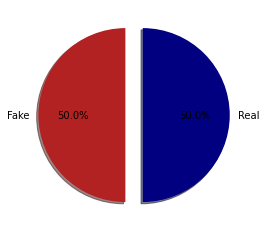

In [9]:
# Checking if our data is well balanced
label_size = [data['Target'].sum(),len(data['Target'])-data['Target'].sum()]
plt.pie(label_size,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','Real'],autopct='%1.1f%%')

In [10]:
#checking for Nan values
data.isnull().sum()

author                     1
published                  0
title                      0
text                       0
language                   2
site_url                   2
main_img_url               2
type                       2
title_without_stopwords    4
text_without_stopwords     3
hasImage                   1
label                      0
Target                     0
dtype: int64

In [11]:
#fill with empty strings
data =data.fillna('')

In [12]:
data.isnull().sum()

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
label                      0
Target                     0
dtype: int64

## Train-test-split

In [15]:
# Train-Validation-Test set split into 70:15:15 ratio
# Train-Temp split . can't  stratify=data['label'] stratify=temp_labels
train_text, temp_text, train_labels, temp_labels = train_test_split(data['title'], data['Target'], 
                                                                    random_state=42, 
                                                                    test_size=0.35,
                                                                    stratify=data['label'], 
                                                                  )
# Validation-Test split
val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                random_state=42, 
                                                                test_size=0.5, 
                                                                stratify=temp_labels
                                                                )

## BERT Fine-tuning

### Load pretrained BERT Model

In [16]:
# Load BERT model and tokenizer via HuggingFace Transformers
bert = AutoModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Prepare Input Data

Text(0, 0.5, 'Number of texts')

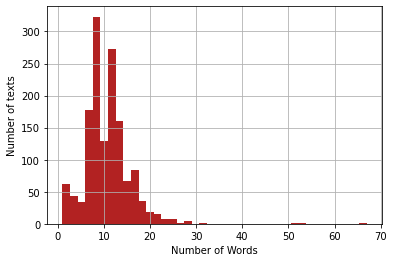

In [17]:
# Plot histogram of the number of words in train data 'title'
seq_len = [len(title.split()) for title in train_text]

pd.Series(seq_len).hist(bins = 40,color='firebrick')
plt.xlabel('Number of Words')
plt.ylabel('Number of texts')

In [18]:
# BERT Tokeizer Functionality
sample_data = ["Build fake news model.", 
               "Using bert."]                                         # sample data
tokenized_sample_data = tokenizer.batch_encode_plus(sample_data,
                                                    padding=True)     # encode text
print(tokenized_sample_data)

# Ref: https://huggingface.co/docs/transformers/preprocessing

{'input_ids': [[101, 3857, 8275, 2739, 2944, 1012, 102], [101, 2478, 14324, 1012, 102, 0, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0, 0]]}


In [19]:
# Majority of titles above have word length under 15. So, we set max title length as 15
MAX_LENGHT = 15
# Tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    val_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)
# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [20]:
# Convert lists to tensors
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(val_labels.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

In [22]:
# Data Loader structure definition
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 16                                          #define a batch size

train_data = TensorDataset(train_seq, train_mask, train_y)    # wrap tensors
train_sampler = RandomSampler(train_data)                     # sampler for sampling the data during training
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
                                                              # dataLoader for train set
val_data = TensorDataset(val_seq, val_mask, val_y)            # wrap tensors
val_sampler = SequentialSampler(val_data)                     # sampler for sampling the data during training
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)
                                                              # dataLoader for validation set

### Freeze Layers

In [23]:
# Freezing the parameters and defining trainable BERT structure
for param in bert.parameters():
    param.requires_grad = False    # false here means gradient need not be computed

### Define Model Architecture

In [24]:
class BERT_Arch(nn.Module):
    def __init__(self, bert):  
      super(BERT_Arch, self).__init__()
      self.bert = bert   
      self.dropout = nn.Dropout(0.1)           # dropout layer 0.1
      self.relu =  nn.ReLU()                    # relu activation function
      self.fc1 = nn.Linear(768,512)             # dense layer 1
      self.fc2 = nn.Linear(512,2)               # dense layer 2 (Output layer)
      self.softmax = nn.LogSoftmax(dim=1)       # softmax activation function
    def forward(self, sent_id, mask):           # define the forward pass  
      cls_hs = self.bert(sent_id, attention_mask=mask)['pooler_output']
                                                # pass the inputs to the model
      x = self.fc1(cls_hs)
      x = self.relu(x)
      x = self.dropout(x)
      x = self.fc2(x)                           # output layer
      x = self.softmax(x)                       # apply softmax activation
      return x

model = BERT_Arch(bert)
# Defining the hyperparameters (optimizer, weights of the classes and the epochs)
# Define the optimizer
from transformers import AdamW
optimizer = AdamW(model.parameters(),
                  lr = 3e-5 )         # learning rate 5E-4
# Define the loss function
cross_entropy  = nn.NLLLoss() 
# Number of training epochs
epochs = 150

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


### Define Train & Evaluate Function

In [25]:
# Defining training and evaluation functions
def train():  
  model.train()
  total_loss, total_accuracy = 0, 0
  
  for step,batch in enumerate(train_dataloader):                # iterate over batches
    if step % 50 == 0 and not step == 0:                        # progress update after every 50 batches.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))
    batch = [r for r in batch]                                  # push the batch to gpu
    sent_id, mask, labels = batch 
    model.zero_grad()                                           # clear previously calculated gradients
    preds = model(sent_id, mask)                                # get model predictions for current batch
    loss = cross_entropy(preds, labels)                         # compute loss between actual & predicted values
    total_loss = total_loss + loss.item()                       # add on to the total loss
    loss.backward()                                             # backward pass to calculate the gradients
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)     # clip gradients to 1.0. It helps in preventing exploding gradient problem
    optimizer.step()                                            # update parameters
    preds=preds.detach().cpu().numpy()                          # model predictions are stored on GPU. So, push it to CPU

  avg_loss = total_loss / len(train_dataloader)                 # compute training loss of the epoch  
                                                                # reshape predictions in form of (# samples, # classes)
  return avg_loss                                 # returns the loss and predictions

def evaluate():  
  print("\nEvaluating...")  
  model.eval()                                    # Deactivate dropout layers
  total_loss, total_accuracy = 0, 0  
  for step,batch in enumerate(val_dataloader):    # Iterate over batches  
    if step % 50 == 0 and not step == 0:          # Progress update every 50 batches.     
                                                  # Calculate elapsed time in minutes.
                                                  # Elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))
                                                  # Report progress
    batch = [t for t in batch]                    # Push the batch to GPU
    sent_id, mask, labels = batch
    with torch.no_grad():                         # Deactivate autograd
      preds = model(sent_id, mask)                # Model predictions
      loss = cross_entropy(preds,labels)          # Compute the validation loss between actual and predicted values
      total_loss = total_loss + loss.item()
      preds = preds.detach().cpu().numpy()
  avg_loss = total_loss / len(val_dataloader)         # compute the validation loss of the epoch
  return avg_loss

### Model training

In [26]:
# Train and predict
best_valid_loss = float('inf')
train_losses=[]                   # empty lists to store training and validation loss of each epoch
valid_losses=[]

for epoch in range(epochs):     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))     
    train_loss = train()                       # train model
    valid_loss = evaluate()                    # evaluate model
    if valid_loss < best_valid_loss:              # save the best model
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'c2_new_model_weights.pt')
    train_losses.append(train_loss)               # append training and validation loss
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.696
Validation Loss: 0.685

 Epoch 2 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.684
Validation Loss: 0.679

 Epoch 3 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.679
Validation Loss: 0.671

 Epoch 4 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.674
Validation Loss: 0.670

 Epoch 5 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.668
Validation Loss: 0.661

 Epoch 6 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.661
Validation Loss: 0.655

 Epoch 7 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.656
Validation Loss: 0.650

 Epoch 8 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.654
Validation Loss: 0.651

 Epoch 9 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.648
Validation Loss: 0.640

 Epoch 10 / 150
  Batch    50  of     91.

Evaluating...

Training Loss: 0.645
Va

In [27]:
pwd

'/content/drive/MyDrive/work'

### Model performance

In [28]:
# load weights of best model
path = '/content/drive/MyDrive/work/c2_new_model_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [29]:
with torch.no_grad():
  preds = model(test_seq, test_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       196
           1       0.72      0.66      0.69       195

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



## Fake News Predictions

In [ ]:
# # load weights of best model
# path = 'c1_fakenews_weights.pt'
# model.load_state_dict(torch.load(path))

In [31]:
# testing on unseen data from testdata.xlsx
unseen_news_text = ["dapl protesters proven right as largest gas pipeline in us experiences massive and deadly explosion",     
                    "iran to resume gas exports to turkey soon",               
                    "tony blair suggests a second referendum to reverse brexit",           
                    "daesh abducts s near mosul to use them as human shields un",
                    "fms of iran syria russia meet in moscow",
                    "assive marine park declared in antarctic ocean",
                    "reasons why i am not voting", #from Train data
                    ]

# tokenize and encode sequences in the test set
MAX_LENGHT = 15
tokens_unseen = tokenizer.batch_encode_plus(
    unseen_news_text,
    max_length = MAX_LENGHT,
    pad_to_max_length=True,
    truncation=True
)

unseen_seq = torch.tensor(tokens_unseen['input_ids'])
unseen_mask = torch.tensor(tokens_unseen['attention_mask'])

with torch.no_grad():
  preds = model(unseen_seq, unseen_mask)
  preds = preds.detach().cpu().numpy()

preds = np.argmax(preds, axis = 1)
preds

array([0, 0, 1, 1, 0, 1, 1])

Fake,Fake,True,True,Fake,True,True

**How to Calculate Precision, Recall, and F1 Score**

Precision gives the proportion of positive predictions that are actually correct. It takes into account false positives, which are cases that were incorrectly flagged for inclusion. Precision can be calculated as:


Recall measures the proportion of actual positives that were predicted correctly. It takes into account false negatives, which are cases that should have been flagged for inclusion but weren't. Recall can be calculated as:


Consider a system designed to distinguish real email from spam. In this system, a real email message is a true positive. A model that throws away all emails as spam will have perfect precision because there are no false positives (no emails incorrectly flagged as real). However, Recall will be 0% because there are no true positives (no emails correctly flagged as real).

A good model needs to strike the right balance between Precision and Recall. For this reason, an F-score (F-measure or F1) is used by combining Precision and Recall to obtain a balanced classification model. F-score is calculated by the harmonic mean of precision




### Conclusion

More dataset would improve the accuracy of this model from 70% at 150 epochs to 98%. Further Training using 3e-5 Alone would make gradient descent converge appropriately. An epoch of 300 would be suitable. Please train on a GPU to reduce training Time